In [1]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
import numpy as np


data = np.array([
    [10, 1000],
    [15, 1500],
    [20, 2000],
    [25, 2500],
    [30, 3000]
])

print("Original Data:")
print(data)

min_max_scaler = MinMaxScaler()
data_min_max_scaled = min_max_scaler.fit_transform(data)
print("\nMin-Max Scaled Data:")
print(data_min_max_scaled)

standard_scaler = StandardScaler()
data_standard_scaled = standard_scaler.fit_transform(data)
print("\nStandardized Data (Mean = 0, Variance = 1):")
print(data_standard_scaled)

robust_scaler = RobustScaler()
data_robust_scaled = robust_scaler.fit_transform(data)
print("\nRobust Scaled Data (Median = 0, IQR = 1):")
print(data_robust_scaled)

normalizer = Normalizer()
data_normalized = normalizer.fit_transform(data)
print("\nNormalized Data (Scaling to Unit Norm):")
print(data_normalized)


Original Data:
[[  10 1000]
 [  15 1500]
 [  20 2000]
 [  25 2500]
 [  30 3000]]

Min-Max Scaled Data:
[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [0.75 0.75]
 [1.   1.  ]]

Standardized Data (Mean = 0, Variance = 1):
[[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]

Robust Scaled Data (Median = 0, IQR = 1):
[[-1.  -1. ]
 [-0.5 -0.5]
 [ 0.   0. ]
 [ 0.5  0.5]
 [ 1.   1. ]]

Normalized Data (Scaling to Unit Norm):
[[0.0099995 0.99995  ]
 [0.0099995 0.99995  ]
 [0.0099995 0.99995  ]
 [0.0099995 0.99995  ]
 [0.0099995 0.99995  ]]


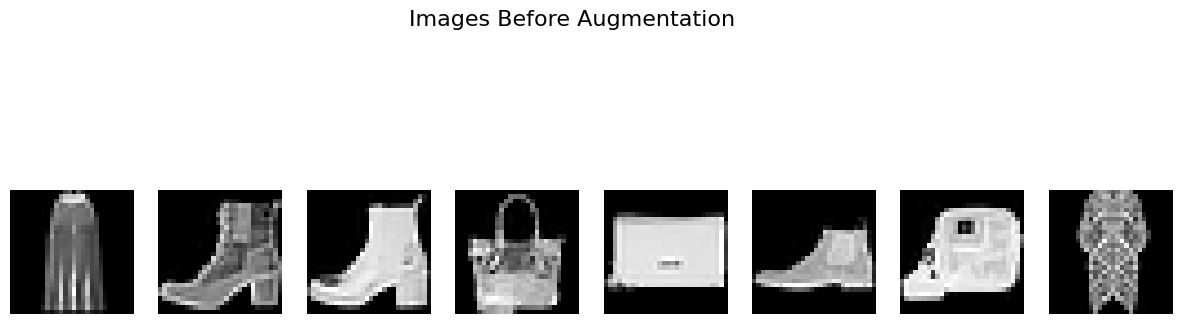

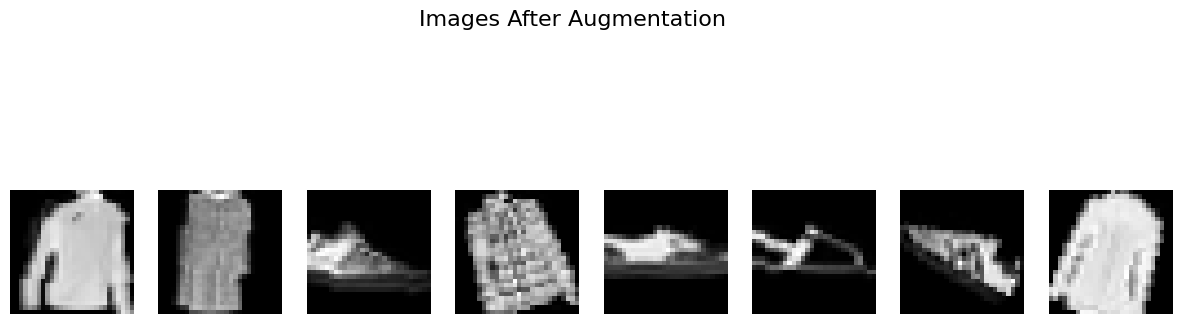

In [2]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


data_path = "/home/manchik-pt7714/Documents/ML Tasks/data/temp/"  
transform_before = transforms.Compose([
    transforms.ToTensor()
])

transform_after = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),  
    transforms.RandomRotation(30),          
    transforms.RandomResizedCrop(28, scale=(0.8, 1.0)),  
    transforms.ToTensor()
])


dataset_before = datasets.FashionMNIST(data_path, download=False, train=True, transform=transform_before)
dataset_after = datasets.FashionMNIST(data_path, download=False, train=True, transform=transform_after)


loader_before = DataLoader(dataset_before, batch_size=8, shuffle=True)
loader_after = DataLoader(dataset_after, batch_size=8, shuffle=True)


def plot_images(images, title):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for img, ax in zip(images, axes):
        ax.imshow(img.squeeze(), cmap="gray")
        ax.axis("off")
    plt.suptitle(title, fontsize=16)
    plt.show()


images_before, _ = next(iter(loader_before))
images_after, _ = next(iter(loader_after))

plot_images(images_before, "Images Before Augmentation")
plot_images(images_after, "Images After Augmentation")


In [3]:
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt


class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN()
optimizer = optim.SGD(model.parameters(), lr=0.1) 
criterion = nn.CrossEntropyLoss()

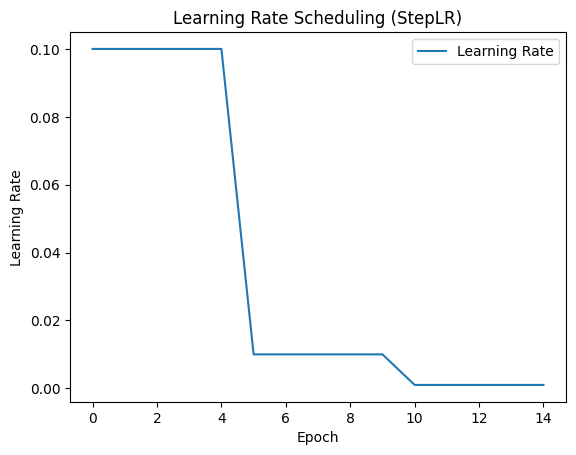

In [4]:
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)


lr_history = []
epochs = 15

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    dummy_data = torch.randn(32, 28 * 28) 
    dummy_target = torch.randint(0, 10, (32,)) 
    output = model(dummy_data)
    loss = criterion(output, dummy_target)
    
    loss.backward()
    optimizer.step()
    

    lr_history.append(optimizer.param_groups[0]['lr'])
    
    scheduler.step()

plt.plot(range(epochs), lr_history, label="Learning Rate")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Scheduling (StepLR)")
plt.legend()
plt.show()

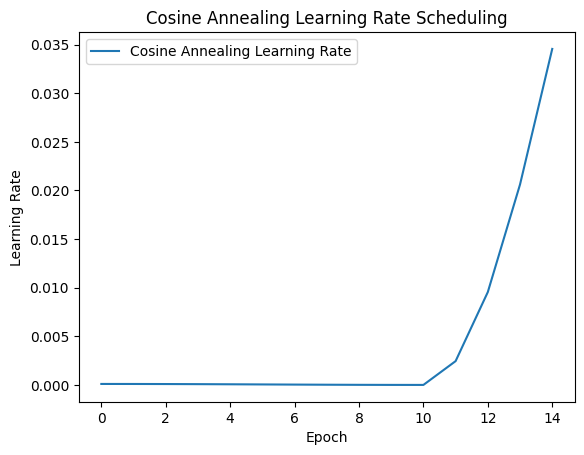

In [5]:
scheduler_cosine = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10, eta_min=0)
lr_history_cosine = []

for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(dummy_data)
    loss = criterion(output, dummy_target)
    loss.backward()
    optimizer.step()
    
    lr_history_cosine.append(optimizer.param_groups[0]['lr'])
    
    scheduler_cosine.step()

plt.plot(range(epochs), lr_history_cosine, label="Cosine Annealing Learning Rate")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Cosine Annealing Learning Rate Scheduling")
plt.legend()
plt.show()


In [7]:
scheduler_plateau = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2, factor=0.5, threshold=0.0001)
validation_loss_history = [1.0, 0.9, 0.8, 0.7, 0.75, 0.73, 0.75, 0.76, 0.77]  

for epoch, val_loss in enumerate(validation_loss_history):
    model.train()
    optimizer.zero_grad()
    dummy_data = torch.randn(32, 28 * 28)
    dummy_target = torch.randint(0, 10, (32,))
    output = model(dummy_data)
    loss = criterion(output, dummy_target)
    loss.backward()
    optimizer.step()
    scheduler_plateau.step(val_loss)
    
    print(f"Epoch {epoch + 1}, Validation Loss: {val_loss:.4f}, LR: {optimizer.param_groups[0]['lr']}")


Epoch 1, Validation Loss: 1.0000, LR: 0.050000000000000225
Epoch 2, Validation Loss: 0.9000, LR: 0.050000000000000225
Epoch 3, Validation Loss: 0.8000, LR: 0.050000000000000225
Epoch 4, Validation Loss: 0.7000, LR: 0.050000000000000225
Epoch 5, Validation Loss: 0.7500, LR: 0.050000000000000225
Epoch 6, Validation Loss: 0.7300, LR: 0.050000000000000225
Epoch 7, Validation Loss: 0.7500, LR: 0.025000000000000112
Epoch 8, Validation Loss: 0.7600, LR: 0.025000000000000112
Epoch 9, Validation Loss: 0.7700, LR: 0.025000000000000112


In [15]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(10, 10)  
        self.fc2 = nn.Linear(10, 1)  

    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)  
        x = self.fc2(x)   
        return x

model = SimpleModel()
criterion = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=0.1, weight_decay=0.01)

inputs = torch.randn(32, 10) 
targets = torch.randn(32, 1) 
for epoch in range(5):
    model.train()
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    print(f"Epoch {epoch+1}:")
    print("First layer weights (before update):", model.fc1.weight[0, :5])  
    print("Output layer weights (before update):", model.fc2.weight[0, :5]) 
    loss.backward()
    optimizer.step()
    print("First layer weights (after update):", model.fc1.weight[0, :5])  
    print("Output layer weights (after update):", model.fc2.weight[0, :5]) 

    print(f"Learning Rate: {optimizer.param_groups[0]['lr']}, Loss: {loss.item()}")
    print("="*50)


Epoch 1:
First layer weights (before update): tensor([-0.0557, -0.1403,  0.0871, -0.2689,  0.1555], grad_fn=<SliceBackward0>)
Output layer weights (before update): tensor([0.2212, 0.0128, 0.2318, 0.1795, 0.2815], grad_fn=<SliceBackward0>)
First layer weights (after update): tensor([-0.0574, -0.1416,  0.0774, -0.2657,  0.1685], grad_fn=<SliceBackward0>)
Output layer weights (after update): tensor([0.1959, 0.0182, 0.2191, 0.1374, 0.2840], grad_fn=<SliceBackward0>)
Learning Rate: 0.1, Loss: 1.4753652811050415
Epoch 2:
First layer weights (before update): tensor([-0.0574, -0.1416,  0.0774, -0.2657,  0.1685], grad_fn=<SliceBackward0>)
Output layer weights (before update): tensor([0.1959, 0.0182, 0.2191, 0.1374, 0.2840], grad_fn=<SliceBackward0>)
First layer weights (after update): tensor([-0.0584, -0.1425,  0.0687, -0.2640,  0.1791], grad_fn=<SliceBackward0>)
Output layer weights (after update): tensor([0.1783, 0.0244, 0.2125, 0.1029, 0.2878], grad_fn=<SliceBackward0>)
Learning Rate: 0.1, L

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

X = torch.randn(8, 1, 28, 28)  
y = torch.randint(0, 10, (8,))

model = SimpleNN()
optimizer = optim.SGD(model.parameters(), lr=0.1)
loss_fn = nn.CrossEntropyLoss()

optimizer.zero_grad()
outputs = model(X) 
loss = loss_fn(outputs, y) 

loss.backward()
print("Gradients before clipping:")
for name, param in model.named_parameters():
    if param.grad is not None:
        print(f"{name} grad: {param.grad.norm()}")

clip_value = 1.0
torch.nn.utils.clip_grad_value_(model.parameters(), clip_value)

print("\nGradients after clipping by value:")
for name, param in model.named_parameters():
    if param.grad is not None:
        print(f"{name} grad: {param.grad.norm()}")

clip_norm = 0.5
torch.nn.utils.clip_grad_norm_(model.parameters(), clip_norm)
print("\nGradients after clipping by norm:")
for name, param in model.named_parameters():
    if param.grad is not None:
        print(f"{name} grad: {param.grad.norm()}")
optimizer.step()


Gradients before clipping:
fc1.weight grad: 3.7071056365966797
fc1.bias grad: 0.13602493703365326
fc2.weight grad: 1.6921346187591553
fc2.bias grad: 0.3678351640701294

Gradients after clipping by value:
fc1.weight grad: 3.7071056365966797
fc1.bias grad: 0.13602493703365326
fc2.weight grad: 1.6921346187591553
fc2.bias grad: 0.3678351640701294

Gradients after clipping by norm:
fc1.weight grad: 0.4527629315853119
fc1.bias grad: 0.016613248735666275
fc2.weight grad: 0.2066669464111328
fc2.bias grad: 0.04492512345314026


In [39]:
import torch
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(784, 128),  
    nn.ReLU(),           
    nn.Linear(128, 64),   
    nn.ReLU(),           
    nn.Linear(64, 10),    
    nn.Softmax(dim=1)     
)


print(model)

x = torch.randn(1, 784)
output = model(x)
print(output)


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)
tensor([[0.1018, 0.0854, 0.0921, 0.0998, 0.1403, 0.1004, 0.0999, 0.0903, 0.1024,
         0.0876]], grad_fn=<SoftmaxBackward0>)


In [40]:
class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 10)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x

model = CustomModel()
x = torch.randn(1, 784)
output = model(x)
print(output)


tensor([[0.0920, 0.0951, 0.0973, 0.1042, 0.0843, 0.0947, 0.1227, 0.1021, 0.1004,
         0.1071]], grad_fn=<SoftmaxBackward0>)


In [41]:
class HybridModel(nn.Module):
    def __init__(self):
        super(HybridModel, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.fc = nn.Linear(16 * 16 * 16, 10)
    
    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)  
        x = self.fc(x)
        return x

model = HybridModel()
x = torch.randn(1, 3, 32, 32)
output = model(x)
print(output)


tensor([[ 0.5076, -0.5527, -0.3920,  0.1706,  0.5427, -0.0278,  0.4514,  0.2810,
         -0.1562,  0.4199]], grad_fn=<AddmmBackward0>)
